In [3]:
import pandas as pd
import numpy as np

In [11]:
def read_file(f: str) -> list:
    l = []
    with open(f,'r') as fr:
        for line in fr:
            l.append(int(line.strip()))
    return l

query_all = read_file("query_length_all.txt")
query_true = read_file("query_length_true.txt")
query_false = read_file("query_length_false.txt")

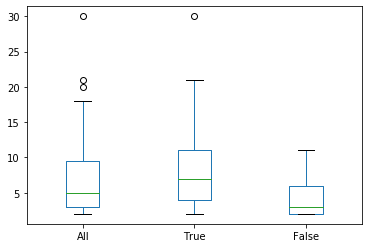

In [46]:
#df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
data = {'All':query_all, 'True':query_true, 'False':query_false}
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()
#df = pd.DataFrame([query_all, query_true, query_false], columns=['All','True','False'])

df.plot.box()

In [22]:
from itertools import combinations
from scipy.stats import ttest_ind
for list1, list2 in combinations(data.keys(), 2):
    t, p = ttest_ind(data[list1], data[list2])
    print(list1, list2, p)

All True 0.08446879451271588
All False 0.004161446434949628
True False 7.858751823483819e-05


In [48]:
print(df)

     All  True  False
0    8.0   8.0    4.0
1    4.0   3.0    4.0
2    3.0   3.0    2.0
3    3.0   6.0    8.0
4    6.0   4.0    7.0
..   ...   ...    ...
106  3.0   NaN    NaN
107  5.0   NaN    NaN
108  5.0   NaN    NaN
109  2.0   NaN    NaN
110  3.0   NaN    NaN

[111 rows x 3 columns]


     All  True  False
0    8.0   8.0    4.0
1    4.0   3.0    4.0
2    3.0   3.0    2.0
3    3.0   6.0    8.0
4    6.0   4.0    7.0
..   ...   ...    ...
106  3.0   NaN    NaN
107  5.0   NaN    NaN
108  5.0   NaN    NaN
109  2.0   NaN    NaN
110  3.0   NaN    NaN

[111 rows x 3 columns]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

All v.s. True: t-test independent samples with Bonferroni correction, P_val=2.534e-01 stat=-1.735e+00
True v.s. False: t-test independent samples with Bonferroni correction, P_val=2.358e-04 stat=4.104e+00
All v.s. False: t-test independent samples with Bonferroni correction, P_val=1.248e-02 stat=2.911e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd36e7998d0>,
  <statannot.StatResult.StatResult at 0x7fd36e6a8ed0>])

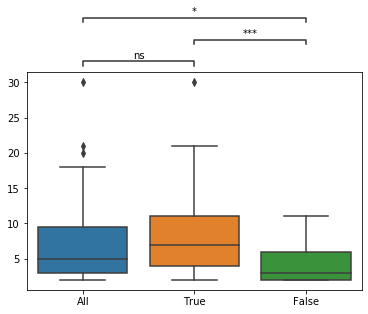

In [63]:
import seaborn as sns
from statannot import add_stat_annotation

#df = sns.load_dataset("tips")
#x = "day"
#y = "query length"
#order = ['Sun', 'Thur', 'Fri', 'Sat']

#df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
data = {'All':query_all, 'True':query_true, 'False':query_false}
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()
#df = pd.DataFrame([query_all, query_true, query_false], columns=['All','True','False'])
print(df)
order = ["All","True","False"]
ax = sns.boxplot(data=df)
#test_results = add_stat_annotation(ax, data=df, order=order,
#                                   box_pairs=[("All", "True"), ("All", "False"), ("True", "False")],
#                                   test='Mann-Whitney', text_format='star',
#                                   loc='outside', verbose=2)

test_results = add_stat_annotation(ax, data=df, order=order,
                                   box_pairs=[("All", "True"), ("All", "False"), ("True", "False")],
                                   test='t-test_ind', text_format='star',
                                   loc='outside', verbose=2)

test_results

    Delta_False  Delta_False2
0      0.007320      0.108525
1      0.002804      0.017986
2      0.108525      0.040970
3      0.032872      0.039614
4      0.028478      0.011552
5      0.031818      0.008203
6      0.005618      0.005896
7      0.029468      0.045203
8      0.080137      0.036065
9      0.001106      0.010213
10     0.049032      0.032124
11     0.000829      0.011534
12     0.022553      0.046693
13     0.021502      0.038799
14     0.005673      0.058059
15     0.017986           NaN
16     0.044025           NaN
17     0.040970           NaN
18     0.039614           NaN
19     0.024626           NaN
20     0.039792           NaN
21     0.051841           NaN
22     0.011552           NaN
23     0.066284           NaN
24     0.008203           NaN
25     0.023173           NaN
26     0.005896           NaN
27     0.045203           NaN
28     0.036065           NaN
29     0.026513           NaN
30     0.010213           NaN
31     0.032124           NaN
32     0.0

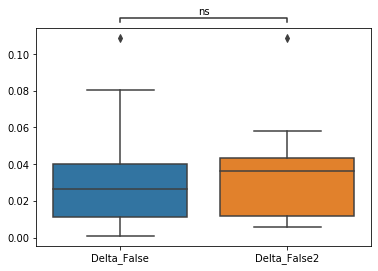

In [66]:
import seaborn as sns
from statannot import add_stat_annotation

def read_file2(f: str) -> list:
    l = []
    with open(f,'r') as fr:
        for line in fr:
            l.append(float(line.strip()))
    return l

delta_false = read_file2("delta_value_false.txt")
delta_false2 = read_file2("delta_value_false_2.txt")

#df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
data = {'Delta_False':delta_false,'Delta_False2':delta_false2}
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()
#df = pd.DataFrame([query_all, query_true, query_false], columns=['All','True','False'])
print(df)
order = ["Delta_False","Delta_False2"]
ax = sns.boxplot(data=df)

test_results = add_stat_annotation(ax, data=df, order=order,
                                   box_pairs=[("Delta_False", "Delta_False2")],
                                   test='t-test_ind', text_format='star',
                                   loc='outside', verbose=2)